# Covid-19 Prediction - Preprocessing

## Import necessary modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import googletrans
from googletrans import Translator

from sklearn.model_selection import train_test_split

## Load Data

In [2]:
df = pd.read_csv('covid_19_full.csv')

## Explore Data

In [3]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2022-03-03,0,0,0,0,0,חיובי,No,נקבה,Other
1,2022-03-03,0,0,0,0,0,חיובי,No,זכר,Other
2,2022-03-03,0,0,0,0,0,חיובי,No,זכר,Other
3,2022-03-03,0,0,0,0,0,חיובי,No,נקבה,Other
4,2022-03-03,0,0,0,0,0,חיובי,No,נקבה,Abroad


In [4]:
df.shape
print('Total no. of samples =', df.shape[0])
print('Total no. of features =', df.shape[1])

Total no. of samples = 9147169
Total no. of features = 10


In [5]:
print('Total no. of elements =', df.size)

Total no. of elements = 91471690


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9147169 entries, 0 to 9147168
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 697.9+ MB


In [7]:
df.describe(include='all')

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,9147169,9147169.00,9147169.00,9147169.00,9147169.00,9147169.00,9147169,7097830,8481538,9147169
unique,723,NaN,NaN,NaN,NaN,NaN,3,2,2,3
top,2022-01-16,NaN,NaN,NaN,NaN,NaN,שלילי,No,נקבה,Other
freq,41014,NaN,NaN,NaN,NaN,NaN,8021753,6153383,4396640,8391862
mean,NaN,0.05,0.04,0.02,0.00,0.04,NaN,NaN,NaN,NaN
std,NaN,0.21,0.19,0.14,0.06,0.19,NaN,NaN,NaN,NaN
min,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
25%,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
50%,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
75%,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [8]:
df.corona_result.value_counts()

שלילי    8021753
חיובי     928930
אחר       196486
Name: corona_result, dtype: int64

### Visualizing Before Preprocessing

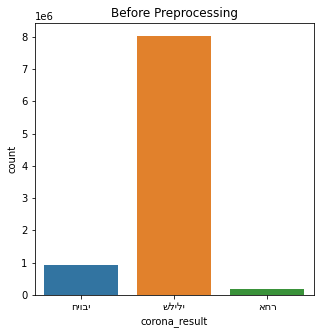

In [9]:
plt.figure(figsize=(5,5))
plt.title("Before Preprocessing")
p1 = sns.countplot(df['corona_result'])
plt.show()

## Pre-processing & EDA

In [10]:
df.isnull().sum()

test_date                    0
cough                        0
fever                        0
sore_throat                  0
shortness_of_breath          0
head_ache                    0
corona_result                0
age_60_and_above       2049339
gender                  665631
test_indication              0
dtype: int64

In [11]:
del df['test_date']

In [12]:
df.dropna(axis = 0, how ='any', inplace=True)

In [13]:
df.shape

(6939346, 9)

In [14]:
df['cough'].unique()

array([0, 1], dtype=int64)

In [15]:
df['fever'].unique()

array([0, 1], dtype=int64)

In [16]:
df['sore_throat'].unique()

array([0, 1], dtype=int64)

In [17]:
df['shortness_of_breath'].unique()

array([0, 1], dtype=int64)

In [18]:
df['head_ache'].unique()

array([0, 1], dtype=int64)

In [19]:
df['corona_result'].unique()

array(['חיובי', 'שלילי', 'אחר'], dtype=object)

In [20]:
translator = Translator()

labels = df['corona_result'].unique()
list_labels = labels.tolist()
list_labels

translations = {}
for values in list_labels:
        translations[values] = translator.translate(values).text
    
print(translations)

{'חיובי': 'Positive', 'שלילי': 'Negative', 'אחר': 'Other'}


In [21]:
df.replace(translations, inplace = True)

In [22]:
index_names = df[df["corona_result"] == "Other"].index
  
df.drop(index_names, inplace = True)
  
df.shape

(6791352, 9)

In [23]:
df.loc[df["corona_result"] == "Negative", "corona_result"] = 0
df.loc[df["corona_result"] == "Positive", "corona_result"] = 1

In [24]:
df['age_60_and_above'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df.loc[df["age_60_and_above"] == "No", "age_60_and_above"] = 0
df.loc[df["age_60_and_above"] == "Yes", "age_60_and_above"] = 1

In [26]:
df['gender'].unique()

array(['נקבה', 'זכר'], dtype=object)

In [27]:
translator = Translator()

labels = df['gender'].unique()
list_labels = labels.tolist()
list_labels

translations = {}
for values in list_labels:
        translations[values] = translator.translate(values).text
    
print(translations)

{'נקבה': 'female', 'זכר': 'male'}


In [28]:
df.replace(translations, inplace = True)

In [29]:
df.loc[df["gender"] == "male", "gender"] = 0
df.loc[df["gender"] == "female", "gender"] = 1

In [30]:
df['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [31]:
df.rename(columns = {'test_indication':'Contact_with_Confirmed'}, inplace = True)

In [32]:
df.loc[df["Contact_with_Confirmed"] == "Contact with confirmed", "Contact_with_Confirmed"] = 1
df.loc[df["Contact_with_Confirmed"] == "Abroad", "Contact_with_Confirmed"] = 0
df.loc[df["Contact_with_Confirmed"] == "Other", "Contact_with_Confirmed"] = 0

In [33]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,Contact_with_Confirmed
0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,1,0


### Visualizing After Preprocessing

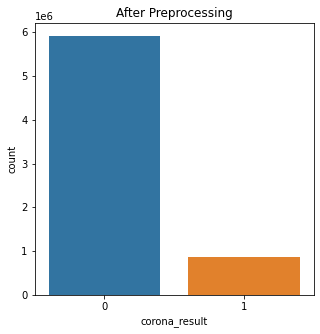

In [34]:
plt.figure(figsize=(5,5))
plt.title("After Preprocessing")
p1 = sns.countplot(df['corona_result'])
plt.show()

### Explore data after Preprocessing

In [35]:
df.shape
print('Total no. of samples after preprocessing =', df.shape[0])
print('Total no. of features after preprocessing =', df.shape[1])

Total no. of samples after preprocessing = 6791352
Total no. of features after preprocessing = 9


In [36]:
print('Total no. of elements after preprocessing =', df.size)

Total no. of elements after preprocessing = 61122168


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6791352 entries, 0 to 9136224
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   cough                   int64 
 1   fever                   int64 
 2   sore_throat             int64 
 3   shortness_of_breath     int64 
 4   head_ache               int64 
 5   corona_result           int64 
 6   age_60_and_above        int64 
 7   gender                  object
 8   Contact_with_Confirmed  object
dtypes: int64(7), object(2)
memory usage: 518.1+ MB


### Sampling the dataset

In [38]:
X = df.drop(["corona_result"], axis=1)
y = df["corona_result"]

X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                     test_size=0.99, 
                                                     random_state=42)

len(X_train), len(X_test)

(67913, 6723439)

In [39]:
df_new = pd.concat([X_train, y_train], axis=1)

In [40]:
df_new.shape

(67913, 9)

In [41]:
X = df_new.drop(["corona_result"], axis=1)
y = df_new["corona_result"]

X_train, X_test, y_train, y_test = train_test_split (X, y, 
                                                     test_size=0.99, 
                                                     random_state=42)

len(X_train), len(X_test)

(679, 67234)

In [42]:
new_df_new = pd.concat([X_train, y_train], axis=1)

In [43]:
new_df_new.shape

(679, 9)

In [44]:
new_df_new.to_csv(r"C:\Users\kiruba-haran\Desktop\covid\covid_old.csv", 
                  header=True, index=False)